# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [70]:
print(f'X:{X.shape}\ny:{y.shape}')

X:(70000, 784)
y:(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [71]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [72]:
import matplotlib.pyplot as plt
x = X.reshape(-1,28,28)

def plot_image(number):
    return plt.imshow(number, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

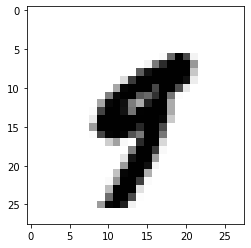

In [73]:
plot_image(x[36000])

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [82]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

y_train = y_train.astype(np.float)
y_test = y_test.astype(np.float)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [80]:
y_train = np.array([num if num == 5 else 0 for num in y_train])
y_test = np.array([num if num == 5 else 0 for num in y_test])

In [83]:
y_train = np.array([1 if num == 5 else 0 for num in y_train])
y_test = np.array([1 if num == 5 else 0 for num in y_test])

In [ ]:
np.where(y_train=='5',0,5)

In [ ]:
np.where(y_train!='5',0,5)

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
import collections

collections.Counter(y_train)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [84]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/golo/miniconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [85]:
logreg.score(X_train, y_train)

0.9778166666666667

In [86]:
df_numbers=pd.DataFrame(logreg.predict_proba(X_train), columns=logreg.classes_)

In [87]:
df_numbers.head()

,0,1
0,0.125827,8.741731e-01
1,0.999884,1.161226e-04
2,0.999999,8.335148e-07
3,0.999407,5.932243e-04
4,0.999870,1.297493e-04


In [88]:
df_numbers.loc[36000]

0    0.997681
1    0.002319
Name: 36000, dtype: float64

The label of number 36000 has been predicted ok with 99% of accuracy

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [89]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [90]:
never_5_clf.fit(X_train, y_train)
never_5_clf.predict(X_train)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [91]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [92]:
confusion_matrix(y_true=y_test, y_pred=logreg.predict(X_test))

array([[9034,   74],
       [ 147,  745]])

In [93]:
confusion_matrix(y_true=y_test, y_pred=never_5_clf.predict(X_test))

array([[9108,    0],
       [ 892,    0]])

In [ ]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [136]:
precision_score(y_true=y_test, y_pred=logreg.predict(X_test)
                ,pos_label=1)
#                 ,average='weighted')

0.9096459096459096

In [137]:
precision_score(y_true=y_test, y_pred=never_5_clf.predict(X_test)
                ,pos_label=1)
#                 ,average='weighted')

/home/golo/miniconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [97]:
recall_score(y_true=y_test, y_pred=logreg.predict(X_test)
             ,pos_label=1)
#             ,average='weighted')

0.8352017937219731

In [98]:
recall_score(y_true=y_test, y_pred=never_5_clf.predict(X_test)
            ,pos_label=1)
#             ,average='weighted')

0.0

In [99]:
f1_score(y_true=y_test, y_pred=logreg.predict(X_test)
        ,pos_label=1)        
#          ,average='weighted')

0.8708357685563999

In [101]:
f1_score(y_true=y_test, y_pred=never_5_clf.predict(X_test))
#          ,pos_label=1)
#             ,average='weighted')
        )

0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [124]:
from sklearn.metrics import roc_curve

roc_curve(y_test, logreg.predict(X_test))

(array([0.        , 0.00812473, 1.        ]),
 array([0.        , 0.83520179, 1.        ]),
 array([2, 1, 0]))

In [125]:
roc_curve(y_test, never_5_clf.predict(X_test))

(array([0., 1.]), array([0., 1.]), array([1, 0]))

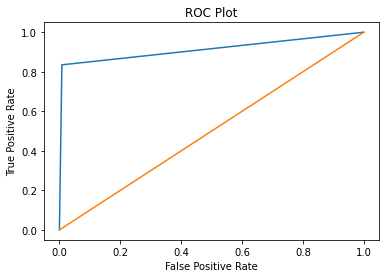

In [134]:
logreg_r_fpr, logreg_r_tpr, logreg_thresholds = roc_curve(y_test, logreg.predict(X_test))
r_fpr, r_tpr,  thresholds  = roc_curve(y_test, never_5_clf.predict(X_test))

plt.plot(logreg_r_fpr, logreg_r_tpr)
plt.plot(r_fpr, r_tpr)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.legend()
plt.show()

### Now find the roc_auc_score for each. 

In [138]:
from sklearn.metrics import roc_auc_score

In [139]:
roc_auc_score(y_test, logreg.predict(X_test))

0.9135385341029717

In [140]:
roc_auc_score(y_test, never_5_clf.predict(X_test))

0.5

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


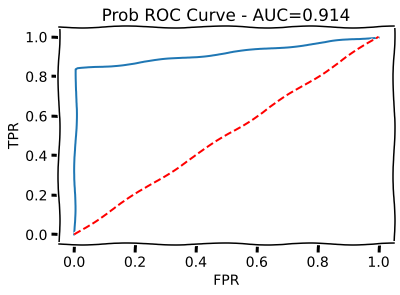

In [147]:
with plt.xkcd():
    logreg_r_fpr, logreg_r_tpr, logreg_thresholds = roc_curve(y_test, logreg.predict(X_test))
    a = roc_auc_score(y_test, logreg.predict(X_test))
    plt.plot(logreg_r_fpr, logreg_r_tpr)
    plt.plot(logreg_r_fpr, logreg_r_fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();


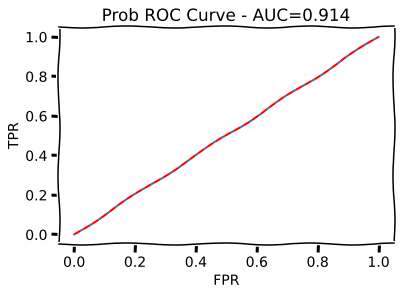

In [148]:
with plt.xkcd():
    r_fpr, r_tpr,  thresholds  = roc_curve(y_test, never_5_clf.predict(X_test))
    a = roc_auc_score(y_test, logreg.predict(X_test))
    plt.plot(r_fpr, r_tpr)
    plt.plot(r_fpr, r_fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve - AUC={a:.3f}')
    plt.show();

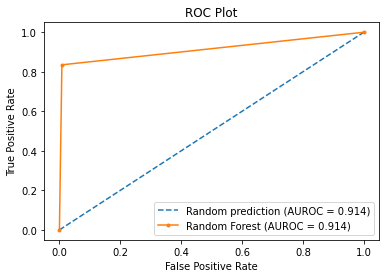

In [152]:
r_auc = roc_auc_score(y_test, logreg.predict(X_test))
logreg_auc = roc_auc_score(y_test, logreg.predict(X_test))
logreg_r_fpr, logreg_r_tpr, logreg_thresholds = roc_curve(y_test, logreg.predict(X_test))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logreg_r_fpr, logreg_r_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % logreg_auc)
# plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### What does this metric tell you? Which classifier works better with this metric in mind?

Logistic regressor works much better and has greater precision than classifier which tends to take values close to the average